In [9]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sys
sys.path.append("../")
from src import pca
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = pd.read_csv("../dat/tracks.csv")
data = data.drop(columns=['Unnamed: 0'])
data.columns

Index(['id', 'name', 'popularity', 'danceability', 'energy', 'liveness',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'tempo',
       'valence', 'key'],
      dtype='object')

# Try PCA

In [54]:
# remove non-continuous and dependent columns and nan rows
data2 = data.dropna()
data_cont = data2.drop(columns=["id", "name", "key", "popularity"])

colnames = data_cont.columns
# turn into np array 
data_np = data_cont.values

# z-standardize data
data_np_n = (data_np-data_np.mean(axis=0)) / data_np.std(axis=0)

In [55]:
colnames

Index(['danceability', 'energy', 'liveness', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'tempo', 'valence'],
      dtype='object')

In [56]:
df_describe = pd.DataFrame(data_np_n, columns=colnames)
df_describe.describe().round(2)

,danceability,energy,liveness,loudness,speechiness,acousticness,instrumentalness,tempo,valence
count,28151.00,28151.00,28151.00,28151.00,28151.00,28151.00,28151.00,28151.00,28151.00
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.43,-2.54,-1.23,-7.43,-0.99,-0.94,-0.53,-3.99,-1.88
25%,-0.60,-0.61,-0.59,-0.29,-0.68,-0.84,-0.53,-0.82,-0.80
50%,0.14,0.12,-0.42,0.27,-0.48,-0.41,-0.53,-0.03,-0.02
75%,0.75,0.77,0.28,0.62,0.39,0.62,-0.32,0.64,0.78
max,1.97,1.71,5.28,2.44,6.21,2.26,2.51,4.24,2.09


In [57]:
eigenvalues, eigenvectors = pca.PCA(data_np_n)

In [58]:
eigenvalues

array([3.13808047, 1.27314088, 1.05179436, 0.97157426, 0.82177949,
       0.68901621, 0.52898584, 0.36827952, 0.15734897])

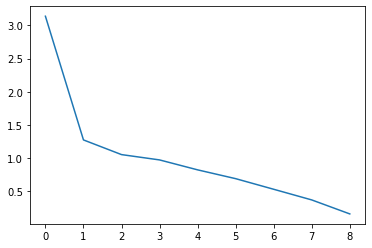

In [59]:
plt.plot(eigenvalues)
plt.show()

In [60]:
data_proj = data_np_n @ eigenvectors[:,:2]

In [61]:
data_np_n.shape

(28151, 9)

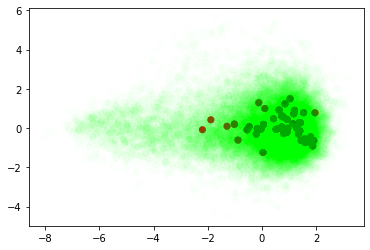

In [73]:
colors = [(1, 0, 0, 1) if p > 90 else (0, 1, 0, 0.01) for p in data2['popularity']]

plt.scatter(data_proj[:,0], data_proj[:,1], c=colors)

plt.show()

(28151, 13)